In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.distributions.normal import Normal

class Policy_Network(nn.Module):
    """Parametrized Policy Network."""

    def __init__(self, obs_space_dims: int, action_space_dims: int):
        """Initializes a neural network that estimates the mean and standard deviation
         of a normal distribution from which an action is sampled from.

        Args:
            obs_space_dims: Dimension of the observation space
            action_space_dims: Dimension of the action space
        """
        super().__init__()

        hidden_space1 = 16  
        hidden_space2 = 32  

        # Shared Network
        self.shared_net = nn.Sequential(
            nn.Linear(obs_space_dims, hidden_space1),
            nn.Tanh(),
            nn.Linear(hidden_space1, hidden_space2),
            nn.Tanh(),
        )

        # Policy Mean specific Linear Layer
        self.policy_mean_net = nn.Sequential(
            nn.Linear(hidden_space2, action_space_dims)
        )

        # Policy Std Dev specific Linear Layer
        self.policy_stddev_net = nn.Sequential(
            nn.Linear(hidden_space2, action_space_dims)
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        """Conditioned on the observation, returns the mean and standard deviation
         of a normal distribution from which an action is sampled from.

        Args:
            x: Observation from the environment

        Returns:
            action_means: predicted mean of the normal distribution
            action_stddevs: predicted standard deviation of the normal distribution
        """
        shared_features = self.shared_net(x.float())

        action_means = self.policy_mean_net(shared_features)
        action_stddevs = torch.log(
            1 + torch.exp(self.policy_stddev_net(shared_features))
        )

        return action_means, action_stddevs

In [5]:
import pickle

with open('nn.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
data

Policy_Network(
  (shared_net): Sequential(
    (0): Linear(in_features=17, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Tanh()
  )
  (policy_mean_net): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (policy_stddev_net): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [38]:
w0 = data.shared_net[0].weight.data
b0 = data.shared_net[0].bias.data
w1 = data.shared_net[2].weight.data
b1 = data.shared_net[2].weight.data
w2 = data.policy_mean_net[0].weight.data
b2 = data.policy_mean_net[0].bias.data

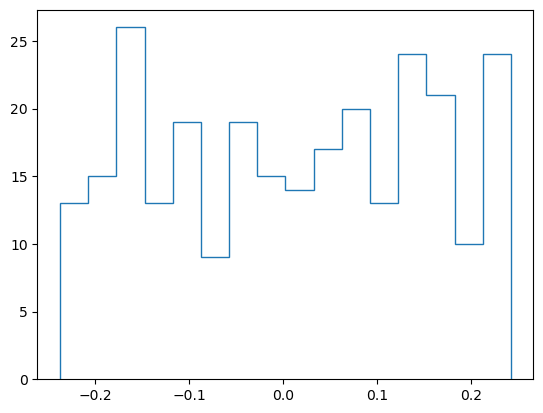

In [33]:
counts, bins = np.histogram(w0, bins=16)
plt.stairs(counts, bins)

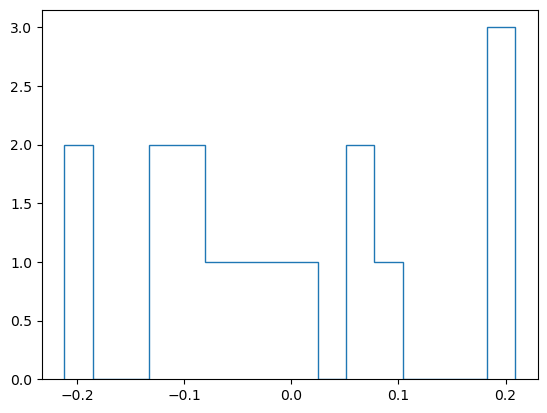

In [34]:
counts, bins = np.histogram(b0, bins=16)
plt.stairs(counts, bins)

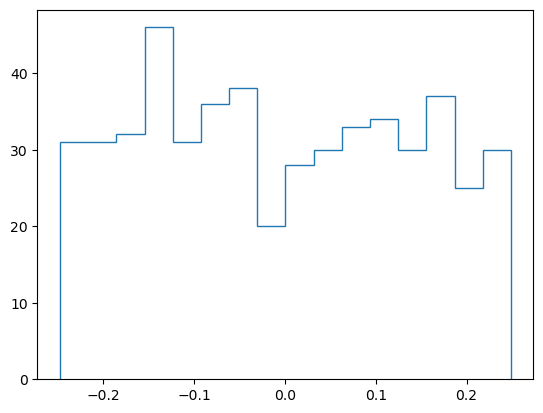

In [36]:
counts, bins = np.histogram(w1, bins=16)
plt.stairs(counts, bins)

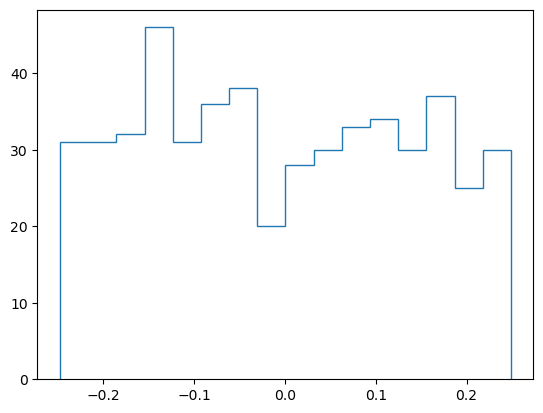

In [37]:
counts, bins = np.histogram(b1, bins=16)
plt.stairs(counts, bins)

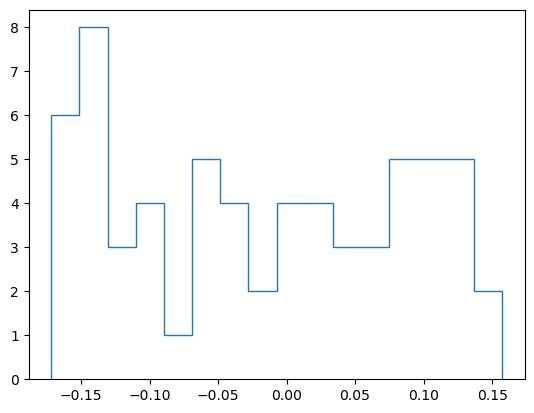

In [40]:
counts, bins = np.histogram(w2, bins=16)
plt.stairs(counts, bins)

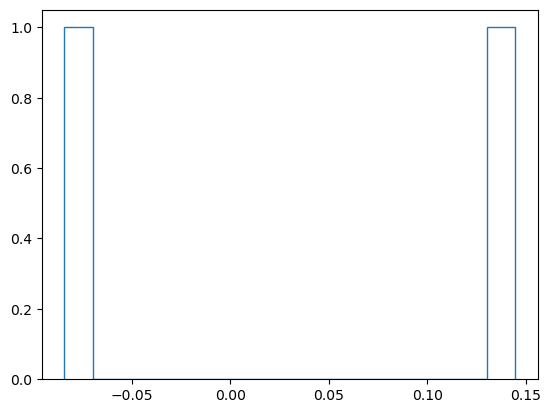

In [41]:
counts, bins = np.histogram(b2, bins=16)
plt.stairs(counts, bins)